In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Link to dataset: https://www.kaggle.com/jealousleopard/goodreadsbooks
    # Citation: Soumik. “Goodreads-Books.” Kaggle, www.kaggle.com/jealousleopard/goodreadsbooks. 
# Questions:
  # 1. What books are the most highly rated from all time?
  # 2. What authors have the most overall ratings?
  # 3. Which publishers have published the most books?
  # 4. Which year has the most books published?

In [107]:
# Hypothesis to questions above
#1 I will base this hypotheses on my prior knowledge of books. Personally, I think one of the books from Harry Potter will have the highest ratings count and average rating, which implies greater popularity. 
#  Most likely, I think it will be the first book, "Harry Potter and the Sorcerer's Stone" by J.K. Rowling since most people would read that book first (even if they don't finish the series).

#2 Since I think Harry Potter will be the most highly rated, I think that J.K. Rowling will have the most overall ratings, despite any hate or controversy surrounding her.

#3. As to which publisher would publish the most popular books, I would say Scholastic Inc. since they partly published Harry Potter (my initial guess is that these books will be the most popular)
# and since they publish a large amount of other childrens books.

#4 I personally have no idea when the most books have published. I am assuming there would be more books published before people were introduced to social media. Thus, I will guess early 2000s.

In [2]:
df = pd.read_csv('goodreads_books_ratings.csv')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [3]:
# Let's clean the table
df = df.iloc[:,:-1]
# We will make bookID the index
df = df.set_index('bookID')
df = df.sort_index(ascending=True)
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
# Assumptions:
# A high average rating is one above 4 stars
# We will base popularity of a book on ratings count because more ratings mean more popularity.
# After looking further into this dataset, I realize that there are some books written in more than once because they have different publishers or they are in a different language. 
# This means the same book may have more review counts than what is seen initially since the same book will be in this data set more than once, but from a different publisher.
# Thus, in this analysis we will assume that each title is different if it is published by more than one publisher. In other words, we will assume that the title of a book and it's 
# publisher is independent from other similar titles (even if it's the same book). 
# This same assumption applies to books written in more than one langauge.
# Also, the author's may have written the same book with different illustrators which also may impact the finidings. So, we will assume each pair is independent again.

In [4]:
# Let's explore the data!
# Total Number of Ratings
total_ratings = np.sum(df['ratings_count'])
print(total_ratings)

199579326


In [5]:
# Total Number of Unique Books by Publisher
total_books = df.title.count()
print(total_books)

11127


In [6]:
# Shape of the DataFrame
shape_df = df.shape
print(shape_df)

(11127, 11)


In [138]:
# Question 1: What books are the most highly rated from all time?
# We will base this question off the number of ratings counted and the average_rating
# To see how highly rated a book is, we will look for the books with the highest ratings count and the highest average rating.
df1 = df.sort_values(by='ratings_count', ascending= False)
df1.head(10)
# It is obvious that "Twilight" by Stephenie Meyer and published by "Little Brown and Company" has the greatest number of ratings, but the average rating isn't as high.
# As we go down the rows, we seee "The Hobbit or There and Back Again" by J.R.R. Tolkien and published by "Houghton Mifflin" has both the greatest number of ratings and the average rating! 
# Thus, my hypothesis was wrong though other Harry Potter books appear near the top.

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
5107,The Catcher in the Rye,J.D. Salinger,3.8,316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL


Text(0.5, 0, 'Number of Ratings (in millions)')

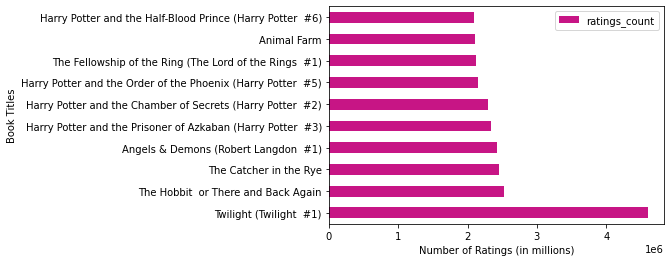

In [139]:
# Let's graph the top 10 books!
df1[:10].plot.barh(x = 'title', y = 'ratings_count', color = 'mediumvioletred')
plt.ylabel('Book Titles')
plt.xlabel('Number of Ratings (in millions)')

(0.0, 5.0)

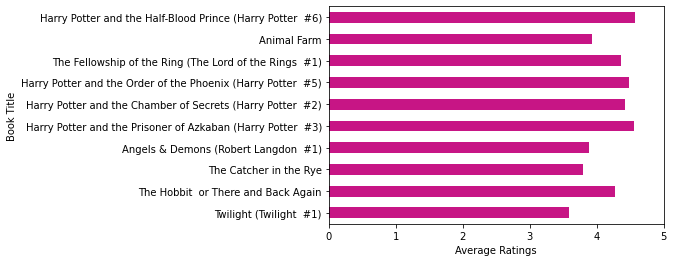

In [140]:
# Convert average_rating to integer value and plot average rating
df1["average_rating"] = pd.to_numeric(df1["average_rating"], errors='coerce')
df1[:10].plot.barh(x = 'title', y = 'average_rating', color = 'mediumvioletred', legend = None)
plt.ylabel('Book Title')
plt.xlabel('Average Ratings')
plt.xlim(0,5)

In [142]:
  # 2. What authors have the most overall ratings?
  # Let's group by the authors to see who has the greatest ratings count! Of course it is important to keep in mind that some authors write more books than another. 
  groupedByAuthorDF = df.groupby(['authors']).sum('ratings_count')
  groupedByAuthorDF = groupedByAuthorDF.sort_values(by='ratings_count', ascending= False)
  groupedByAuthorDF.head(10)
  # As we can see J.K. Rowling/Mary GrandPré (illustrator) have the greatest ratings count and follows them having the most popularity. This follows my hypothesis from the beginning. 

,ratings_count,text_reviews_count
authors,,
J.K. Rowling/Mary GrandPré,8923980,128006
J.R.R. Tolkien,4776638,49090
Stephenie Meyer,4597666,94265
Dan Brown,4135380,60875
Nicholas Sparks,3048149,60426
Stephen King,2985634,55897
J.D. Salinger,2777908,52598
Rick Riordan,2413447,69769
George Orwell/Boris Grabnar/Peter Škerl,2111750,29677


Text(0.5, 0, 'Number of Ratings (in millions)')

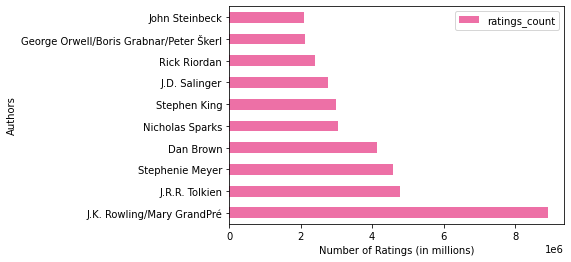

In [143]:
#Let's see a bar chart for the top 10 authors' ratings count!
groupedByAuthorDF[:10].plot.barh(y = 'ratings_count', color=(0.9, 0.2, 0.5, 0.7))
plt.ylabel('Authors')
plt.xlabel('Number of Ratings (in millions)')
# x axis in millions

In [144]:
  # 3. Which publishers have published the most books?
  # Let's group by publisher and count their works!
  groupedByPublisherDF = df.groupby(['publisher']).agg(count=pd.NamedAgg(column='publisher', aggfunc='count')).sort_values(['count'], ascending = False)
  groupedByPublisherDF.head(10)
  # It looks like Vintage has published the most books and my hypothesis isn't even on the top 10 list! 

,count
publisher,
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,144
HarperCollins,112
Harper Perennial,112
Pocket Books,111
Bantam,110


In [146]:
  # Let's see how many books my hypothesis guess Scholatic Inc. Published
  filtered_data = groupedByPublisherDF[groupedByPublisherDF.index == 'Scholastic Inc.']
  filtered_data.head()
  # My guess was far off

,count
publisher,
Scholastic Inc.,13


(0.0, 349.0)

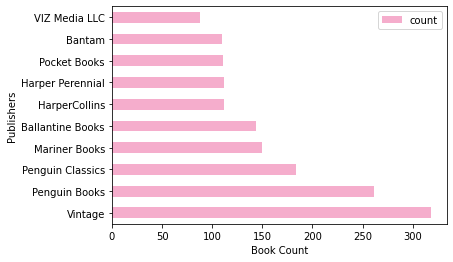

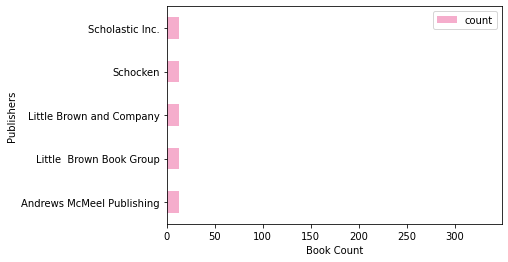

In [154]:
# Let's see this difference in a graph: (top 10)
groupedByPublisherDF[0:10].plot.barh(y = 'count', color=(0.9, 0.2, 0.5, 0.4))
plt.xlabel('Book Count')
plt.ylabel('Publishers')

# My hypothesis:
groupedByPublisherDF[165:170].plot.barh(y = 'count', color=(0.9, 0.2, 0.5, 0.4))
plt.xlabel('Book Count')
plt.ylabel('Publishers')
plt.xlim(0,349)


In [157]:
# 4. Which year has the most books published?
# Let's convert publication_date column to a timestamp
df['publication_date'] = pd.to_datetime(df['publication_date'],  errors='coerce')
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic


In [158]:
# Let's look at the number of books published each year over time!
groupedByYearDF = df.groupby([df.publication_date.dt.year]).agg(count=pd.NamedAgg(column='publication_date', aggfunc='count')).sort_values(['count'], ascending = False)
groupedByYearDF.head(10)
# It looks like the year 2006 had the most publications! 

,count
publication_date,
2006.0,1700
2005.0,1260
2004.0,1069
2003.0,931
2002.0,798
2001.0,655
2000.0,533
2007.0,518
1999.0,450


Text(0, 0.5, 'Book Count')

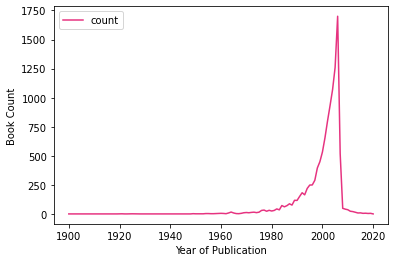

In [159]:
# Let's graph this in a chart!
groupedByYearDF = groupedByYearDF.sort_index()    # orders the years to prepare it for graphing
groupedByYearDF.plot(y = ['count'], color=(0.9, 0.2, 0.5, 1))
plt.xlabel('Year of Publication')
plt.ylabel('Book Count')
# It looks like little books were published before the late 1990s, but that can be because there is not enough data in this set.

Text(0, 0.5, 'Book Count')

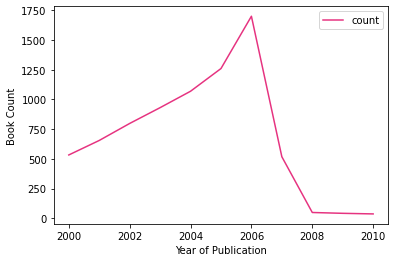

In [168]:
# Lets zoom in!
groupedByYearDF = groupedByYearDF.sort_index()    # orders the years to prepare it for graphing
groupedByYearDF[2000:2010].plot(y = ['count'], color=(0.9, 0.2, 0.5, 1))
plt.xlabel('Year of Publication')
plt.ylabel('Book Count')